In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [31]:
# def read_dataset():
df = pd.read_csv("sonar.csv")
print(len(df.columns))
X = df[df.columns[1:60]].values
y = df[df.columns[60]]

61


In [32]:
X

array([[0.0523, 0.0843, 0.0689, ..., 0.0049, 0.0052, 0.0044],
       [0.0582, 0.1099, 0.1083, ..., 0.0164, 0.0095, 0.0078],
       [0.0171, 0.0623, 0.0205, ..., 0.0044, 0.004 , 0.0117],
       ...,
       [0.0437, 0.018 , 0.0292, ..., 0.0138, 0.0077, 0.0031],
       [0.0353, 0.049 , 0.0608, ..., 0.0079, 0.0036, 0.0048],
       [0.0363, 0.0136, 0.0272, ..., 0.0036, 0.0061, 0.0115]])

In [33]:
print(X.shape)
print(X.shape[1])
print(X.shape[0])

(207, 59)
59
207


In [34]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [35]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
type(y)

numpy.ndarray

In [37]:
n_labels = len(y)
n_unique_labels = len(np.unique(y))
one_hot_encode = np.zeros((n_labels, n_unique_labels))
one_hot_encode[np.arange(n_labels), y] = 1
Y = one_hot_encode

In [38]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [39]:
# mu = np.mean(X, axis=0)
# sigma = np.std(X, axis=0)
# X = (X - mu)/sigma

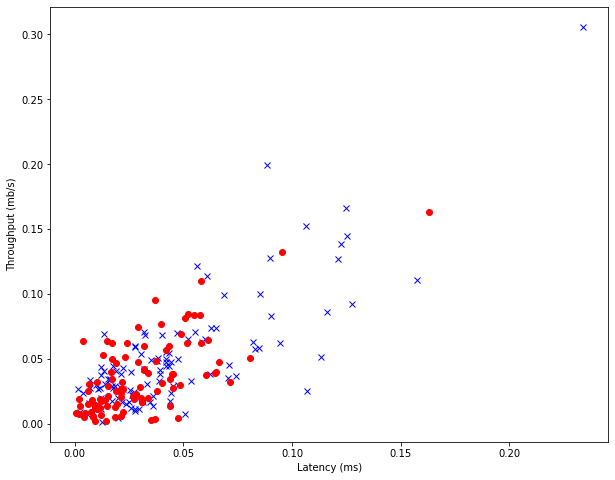

In [40]:
normal = np.where(y==0)
outliers = np.where(y==1)
fig = plt.figure(figsize=(10,8))
plt.plot(X[normal, 0], X[normal, 1], 'bx')
plt.plot(X[outliers, 0], X[outliers, 1], 'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [41]:
X,Y = shuffle(X,Y,random_state=1)
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.20, random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(165, 59)
(165, 2)
(42, 59)
(42, 2)


In [42]:
learning_rate = 0.1
training_epochs = 500
cost_history = np.empty(shape=[1], dtype=float)

n_dim = X.shape[1]
n_class = 2

In [43]:
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [44]:
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [45]:
b.shape

TensorShape([Dimension(2)])

In [46]:
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))    
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [47]:
def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer
    

In [48]:
init = tf.global_variables_initializer()

In [49]:
y = multilayer_perceptron(x, weights, biases)
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [50]:
sess = tf.Session()
sess.run(init)
mse_history = []
accuracy_history =[]

In [51]:
for epoch in range( training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_:train_y})
    cost_history = np.append(cost_history, cost)
    
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x:test_x}) 
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)   
    
    accuracy = (sess.run(accuracy, feed_dict={x: test_x, y_: test_y}))
    accuracy_history.append(accuracy)
    
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Accuracy: ",accuracy)

epoch :  0  -  cost:  74.86523  - MSE:  4755.709842547472 - Accuracy:  0.5
epoch :  1  -  cost:  3.3118508  - MSE:  144.97685842202895 - Accuracy:  0.5
epoch :  2  -  cost:  22.504488  - MSE:  451.54930195299147 - Accuracy:  0.5
epoch :  3  -  cost:  7.8397765  - MSE:  116.33203850735245 - Accuracy:  0.5
epoch :  4  -  cost:  9.248788  - MSE:  93.00229827136101 - Accuracy:  0.5
epoch :  5  -  cost:  7.2676134  - MSE:  88.27459783784664 - Accuracy:  0.5
epoch :  6  -  cost:  4.0957894  - MSE:  32.210887879220216 - Accuracy:  0.5
epoch :  7  -  cost:  6.7007685  - MSE:  72.4410470905807 - Accuracy:  0.5
epoch :  8  -  cost:  1.3935223  - MSE:  12.20021075771436 - Accuracy:  0.5
epoch :  9  -  cost:  5.174225  - MSE:  49.66037282517242 - Accuracy:  0.5
epoch :  10  -  cost:  1.1426486  - MSE:  10.661067080780699 - Accuracy:  0.5
epoch :  11  -  cost:  3.496996  - MSE:  29.110501547394538 - Accuracy:  0.5
epoch :  12  -  cost:  1.52648  - MSE:  9.214153287971877 - Accuracy:  0.5
epoch :  1

epoch :  100  -  cost:  0.51745313  - MSE:  4.525983341012689 - Accuracy:  0.6904762
epoch :  101  -  cost:  0.51186943  - MSE:  6.727110076671814 - Accuracy:  0.6666667
epoch :  102  -  cost:  0.5051395  - MSE:  4.58115811387004 - Accuracy:  0.6904762
epoch :  103  -  cost:  0.50901526  - MSE:  6.8276720080865925 - Accuracy:  0.6666667
epoch :  104  -  cost:  0.52435815  - MSE:  4.255080034406009 - Accuracy:  0.6904762
epoch :  105  -  cost:  0.5044656  - MSE:  6.450168476684907 - Accuracy:  0.6904762
epoch :  106  -  cost:  0.48582524  - MSE:  4.644151311479064 - Accuracy:  0.71428573
epoch :  107  -  cost:  0.4876299  - MSE:  6.661995651233947 - Accuracy:  0.64285713
epoch :  108  -  cost:  0.49901548  - MSE:  4.380977429724116 - Accuracy:  0.6904762
epoch :  109  -  cost:  0.48895794  - MSE:  6.49391056397357 - Accuracy:  0.6666667
epoch :  110  -  cost:  0.47545448  - MSE:  4.605681301515279 - Accuracy:  0.6904762
epoch :  111  -  cost:  0.4787264  - MSE:  6.6505540379123715 - Acc

epoch :  197  -  cost:  0.35807624  - MSE:  5.962324984283056 - Accuracy:  0.7380952
epoch :  198  -  cost:  0.34504595  - MSE:  4.408112983614287 - Accuracy:  0.7380952
epoch :  199  -  cost:  0.35244521  - MSE:  6.087824439274851 - Accuracy:  0.7380952
epoch :  200  -  cost:  0.3621728  - MSE:  4.1660814427312385 - Accuracy:  0.7380952
epoch :  201  -  cost:  0.34960467  - MSE:  5.893680734767628 - Accuracy:  0.71428573
epoch :  202  -  cost:  0.3450366  - MSE:  4.268148185421735 - Accuracy:  0.7380952
epoch :  203  -  cost:  0.3384141  - MSE:  5.78854759913205 - Accuracy:  0.7380952
epoch :  204  -  cost:  0.3290113  - MSE:  4.445249895950768 - Accuracy:  0.7380952
epoch :  205  -  cost:  0.33363605  - MSE:  5.908387720991625 - Accuracy:  0.7380952
epoch :  206  -  cost:  0.3399697  - MSE:  4.297031435377751 - Accuracy:  0.7380952
epoch :  207  -  cost:  0.33336043  - MSE:  5.737356376173979 - Accuracy:  0.7380952
epoch :  208  -  cost:  0.32644147  - MSE:  4.455096939424526 - Accur

epoch :  294  -  cost:  0.24624546  - MSE:  4.844898852916943 - Accuracy:  0.78571427
epoch :  295  -  cost:  0.25277954  - MSE:  6.2020780705393985 - Accuracy:  0.71428573
epoch :  296  -  cost:  0.27071595  - MSE:  4.710520524323332 - Accuracy:  0.78571427
epoch :  297  -  cost:  0.265736  - MSE:  6.214412009899492 - Accuracy:  0.71428573
epoch :  298  -  cost:  0.26768458  - MSE:  4.880399453248607 - Accuracy:  0.78571427
epoch :  299  -  cost:  0.29248804  - MSE:  6.657328831375258 - Accuracy:  0.71428573
epoch :  300  -  cost:  0.33226538  - MSE:  4.69504948804691 - Accuracy:  0.7619048
epoch :  301  -  cost:  0.32423225  - MSE:  6.606136565277831 - Accuracy:  0.7380952
epoch :  302  -  cost:  0.32131842  - MSE:  4.773408905335484 - Accuracy:  0.78571427
epoch :  303  -  cost:  0.325655  - MSE:  6.800823578012385 - Accuracy:  0.7380952
epoch :  304  -  cost:  0.31762052  - MSE:  4.711594468789862 - Accuracy:  0.7619048
epoch :  305  -  cost:  0.2948486  - MSE:  6.310384836637125 -

epoch :  390  -  cost:  0.22798969  - MSE:  5.307114106594668 - Accuracy:  0.8095238
epoch :  391  -  cost:  0.22943032  - MSE:  6.91324441266201 - Accuracy:  0.71428573
epoch :  392  -  cost:  0.22604927  - MSE:  5.271225336173426 - Accuracy:  0.8333333
epoch :  393  -  cost:  0.2085386  - MSE:  6.485753326678582 - Accuracy:  0.7380952
epoch :  394  -  cost:  0.18852778  - MSE:  5.38840610459883 - Accuracy:  0.8333333
epoch :  395  -  cost:  0.1838396  - MSE:  6.3875543658679526 - Accuracy:  0.7619048
epoch :  396  -  cost:  0.18414694  - MSE:  5.312340315695279 - Accuracy:  0.8333333
epoch :  397  -  cost:  0.17684698  - MSE:  6.3586828016505645 - Accuracy:  0.78571427
epoch :  398  -  cost:  0.1779194  - MSE:  5.38083000509474 - Accuracy:  0.8095238
epoch :  399  -  cost:  0.17593731  - MSE:  6.379097174143776 - Accuracy:  0.7619048
epoch :  400  -  cost:  0.1825951  - MSE:  5.384260325318854 - Accuracy:  0.8333333
epoch :  401  -  cost:  0.17907503  - MSE:  6.551153016555226 - Accu

epoch :  487  -  cost:  0.117626354  - MSE:  6.625994331185447 - Accuracy:  0.78571427
epoch :  488  -  cost:  0.11297664  - MSE:  6.301694488648655 - Accuracy:  0.78571427
epoch :  489  -  cost:  0.11122862  - MSE:  6.561559729707744 - Accuracy:  0.78571427
epoch :  490  -  cost:  0.10882544  - MSE:  6.433906184533899 - Accuracy:  0.78571427
epoch :  491  -  cost:  0.10664018  - MSE:  6.5761972216977895 - Accuracy:  0.78571427
epoch :  492  -  cost:  0.1053996  - MSE:  6.5351115875653205 - Accuracy:  0.78571427
epoch :  493  -  cost:  0.10390315  - MSE:  6.645483210199482 - Accuracy:  0.78571427
epoch :  494  -  cost:  0.103004016  - MSE:  6.600798255544187 - Accuracy:  0.78571427
epoch :  495  -  cost:  0.101726025  - MSE:  6.714114757168852 - Accuracy:  0.78571427
epoch :  496  -  cost:  0.100960955  - MSE:  6.652794639209692 - Accuracy:  0.78571427
epoch :  497  -  cost:  0.10034425  - MSE:  6.787675639076996 - Accuracy:  0.78571427
epoch :  498  -  cost:  0.10002004  - MSE:  6.719

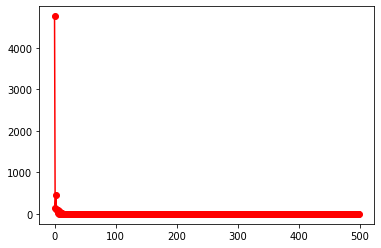

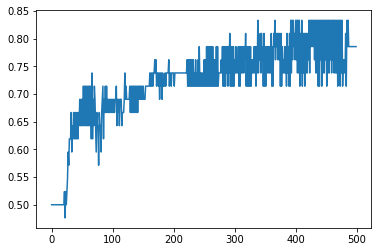

In [52]:
plt.plot(mse_history, 'ro-')
plt.show()
plt.plot(accuracy_history)
plt.show()

In [53]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_:test_y})))

Accuracy:  0.78571427


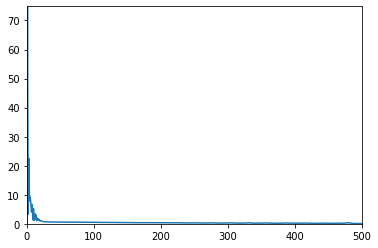

In [54]:
plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()

In [55]:
pred_y

array([[-2.5783937 , -0.6534178 ],
       [-2.994759  ,  1.6772165 ],
       [ 2.5802183 , -1.8558747 ],
       [-1.6801009 ,  1.9947574 ],
       [-2.6171231 , -0.7378855 ],
       [ 1.1855552 ,  2.089876  ],
       [-2.9391296 ,  2.1117265 ],
       [ 0.18150568,  0.73582184],
       [ 1.263845  ,  2.0459135 ],
       [ 0.8141558 , -0.65882635],
       [ 1.1851623 ,  2.2478526 ],
       [ 2.241562  ,  4.402326  ],
       [ 0.62776554, -2.4580731 ],
       [ 3.2281325 , -0.5085393 ],
       [11.579482  ,  2.3770976 ],
       [ 0.9859998 ,  2.6045353 ],
       [-2.0290847 , -3.3500285 ],
       [-3.2400277 ,  1.9234657 ],
       [ 2.529334  , -0.8686806 ],
       [ 2.7970254 , -0.08729956],
       [ 2.7177117 ,  0.8331361 ],
       [-1.7616173 ,  2.966339  ],
       [ 3.9253333 ,  0.9896226 ],
       [ 2.81392   , -0.12163243],
       [ 3.6466243 , -0.4872367 ],
       [ 0.18840122,  4.471168  ],
       [ 2.9302227 , -3.1859496 ],
       [-1.9815855 ,  1.652633  ],
       [-1.9865396 ,

In [56]:
test_y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [57]:
sess.close()